Amplitude: 1
Voltage Mean: -0.005 V
Voltage Standard Deviation: 0.004 V
Amplitude: 2
Voltage Mean: -0.009 V
Voltage Standard Deviation: 0.008 V
Amplitude: 3
Voltage Mean: -0.014 V
Voltage Standard Deviation: 0.013 V


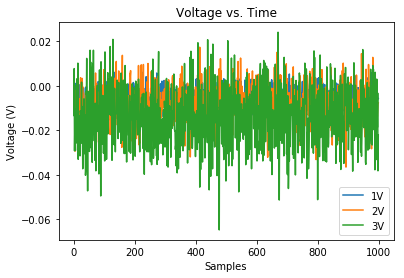

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023

@author: AJ
"""

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd
#import statistics


#FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR') # Rigol DG1022 noise generator

gen.write('*RST') # Reset the generator
#gen.write('SOUR1:APPL:NOIS 1')  # APPLy:NOISe [<frequency |DEFault>[,<amplitude>[,<offset>]]]
#gen.write('SOUR1:APPL:GAUS 0, 1, 0.2')  # Setting mean=0, amplitude=1, standard deviation=0.2
#gen.write('SOUR1:APPL:SINE 10000, 0.2') 
gen.write('OUTPut1:STATe On')
# Modulate the input current with external noise
#for i in range(12):
#    
#    #voltage = float(osc.query('MEAS:VAV?'))
#    print(f'Amplitude: {amplitude}')

# Close the instruments

df = pd.DataFrame()
voltage_mean = []
#SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_voltage:
    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai7") # Set the channel to read from
    send_voltage.timing.cfg_samp_clk_timing(rate=5000) # Set the sampling rate

    # Read the voltage
    for i in range(1, 4):
        amplitude =  i # Change the amplitude of the noise signal
        # gen.write(f'SOUR1:APPL:SIN {frequ}, 2') # Set the noise amplitude
        gen.write(f'SOUR1:APPL:NOIS {amplitude}') # APPLy:NOISe [<frequency |DEFault>[,<amplitude>[,<offset>]]]
        time.sleep(1) # Wait for the noise to settle
        voltage = send_voltage.read(number_of_samples_per_channel=10000)
        df[f'{amplitude}V'] = voltage
        voltage_mean.append(np.mean(voltage))
        voltage_std = np.std(voltage)
        print(f'Amplitude: {amplitude}')
        print(f'Voltage Mean: {np.mean(voltage):.3f} V')
        print(f'Voltage Standard Deviation: {voltage_std:.3f} V')

        
gen.write('OUTPut1:STATe Off') # Turn off the generator
gen.close()

for i in range(1, 4):
    plt.plot(df.iloc[:, i - 1])
    
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time')
plt.show()

Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.000 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 0.42857142857142855
Current Mean (I-Mon): -0.001 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.002 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 0.8571428571428571
Current Mean (I-Mon): -0.004 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.004 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 1.2857142857142856
Current Mean (I-Mon): -0.005 A
Voltage Mean (V-Mon): -0.004 V
Current Standard Deviation (I-Mon): 0.005 A
Voltage Standard Deviation (V-Mon): 0.002 V
Amplitude: 1.7142857142857142
Current Mean (I-Mon): -0.007 A
Voltage Mean (V-Mon): -0.004 V
Current Standard Deviation (I-Mon): 0.007 A
Voltage Standard Deviation (V-Mon): 0.003 V
Amplitude: 2.142857142857143
Current Mean (I-Mon): -0.012 A
Voltage Mean (V-Mon): -0.007 V
Current Standard Deviati

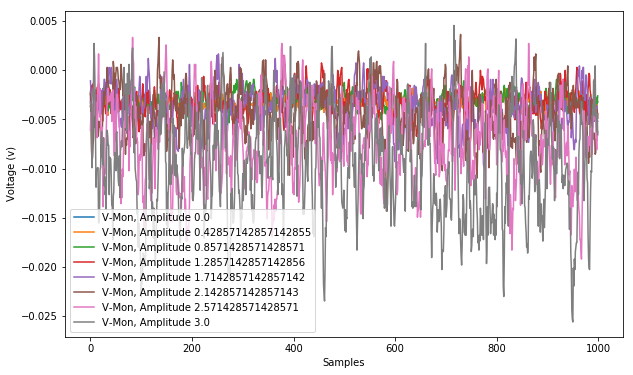

In [26]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1
#gen.write('OUTPut2:STATe On')  # Turning on the output of Channel 2

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data
voltage_mean = []

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai3")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 8)
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

# The rest of your code for closing the generator and plotting the data
gen.write('OUTPut1:STATe Off')
#gen.write('OUTPut2:STATe Off')  # Turn off the generator
gen.close()

# Plot data from both channels
for i in amplitude_range:
    current_column_index = int(2 * (i - 1))  # For example, if i is 1, then current_column_index would be 0,
    voltage_column_index = int(2 * i)        # and voltage_column_index would be 2. If i is 2, then current_column_index would be
                                             # 2, and voltage_column_index would be 4, and so on.
   

    # Check if the indices are within the valid range
    #if current_column_index < df.shape[1]:
     #   plt.plot(df.iloc[:, current_column_index], label=f'I-Mon, Amplitude {i}')

    if voltage_column_index < df1.shape[1]:
        plt.plot(df1.iloc[:, voltage_column_index], label=f'V-Mon, Amplitude {i}')
        
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (v)')
plt.title('')
plt.show()


Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.000 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 0.42857142857142855
Current Mean (I-Mon): -0.001 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.002 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 0.8571428571428571
Current Mean (I-Mon): -0.004 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.003 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 1.2857142857142856
Current Mean (I-Mon): -0.005 A
Voltage Mean (V-Mon): -0.004 V
Current Standard Deviation (I-Mon): 0.005 A
Voltage Standard Deviation (V-Mon): 0.002 V
Amplitude: 1.7142857142857142
Current Mean (I-Mon): -0.006 A
Voltage Mean (V-Mon): -0.005 V
Current Standard Deviation (I-Mon): 0.007 A
Voltage Standard Deviation (V-Mon): 0.003 V
Amplitude: 2.142857142857143
Current Mean (I-Mon): -0.011 A
Voltage Mean (V-Mon): -0.008 V
Current Standard Deviati

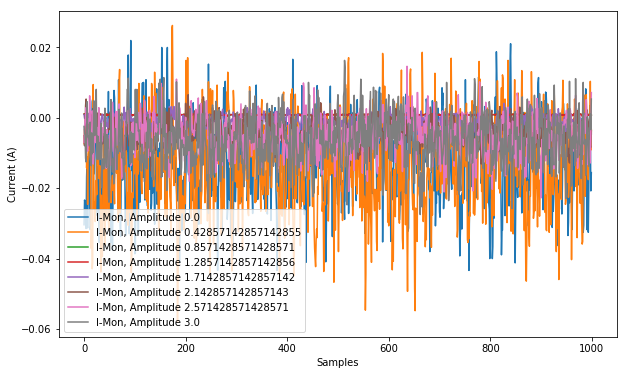

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1
#gen.write('OUTPut2:STATe On')  # Turning on the output of Channel 2

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data
voltage_mean = []

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai3")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 8)
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

# The rest of your code for closing the generator and plotting the data
gen.write('OUTPut1:STATe Off')
#gen.write('OUTPut2:STATe Off')  # Turn off the generator
gen.close()

# Plot data from both channels
for i in amplitude_range:
    current_column_index = int(2 * (i - 1))  # For example, if i is 1, then current_column_index would be 0,
    voltage_column_index = int(2 * i)        # and voltage_column_index would be 2. If i is 2, then current_column_index would be
                                             # 2, and voltage_column_index would be 4, and so on.
   

    # Check if the indices are within the valid range
    if current_column_index < df.shape[1]:
        plt.plot(df.iloc[:, current_column_index], label=f'I-Mon, Amplitude {i}')

    #if voltage_column_index < df1.shape[1]:
     #   plt.plot(df1.iloc[:, voltage_column_index], label=f'V-Mon, Amplitude {i}')
        
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.title('')
plt.show()


Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.000 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 0.42857142857142855
Current Mean (I-Mon): -0.001 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.002 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 0.8571428571428571
Current Mean (I-Mon): -0.004 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.003 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 1.2857142857142856
Current Mean (I-Mon): -0.006 A
Voltage Mean (V-Mon): -0.004 V
Current Standard Deviation (I-Mon): 0.005 A
Voltage Standard Deviation (V-Mon): 0.002 V
Amplitude: 1.7142857142857142
Current Mean (I-Mon): -0.007 A
Voltage Mean (V-Mon): -0.005 V
Current Standard Deviation (I-Mon): 0.007 A
Voltage Standard Deviation (V-Mon): 0.003 V
Amplitude: 2.142857142857143
Current Mean (I-Mon): -0.011 A
Voltage Mean (V-Mon): -0.008 V
Current Standard Deviati

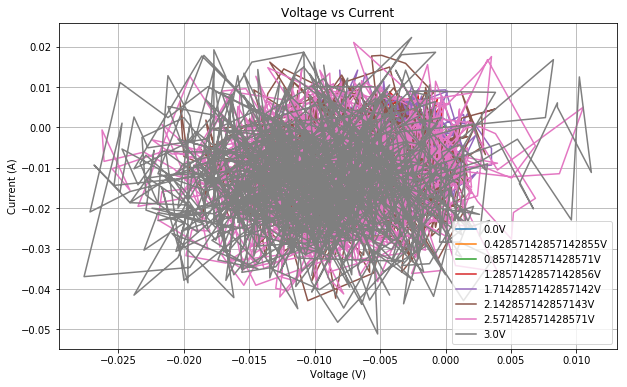

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai3")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 8)
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        try:
            gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        except Exception as e:
            print(f"Error writing to instrument: {e}")
            continue

        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

        # Plot voltage_data respect to current_data
        plt.plot(voltage_data, current_data, label=f'{amplitude}V')

# Customize the plot
plt.title('Voltage vs Current')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid(True)
plt.show()

# The rest of your code for closing the generator and plotting the data
try:
    gen.write('OUTPut1:STATe Off')
    gen.close()
except Exception as e:
    print(f"Error closing the instrument: {e}")


Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.000 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 0.5555555555555556
Current Mean (I-Mon): -0.002 A
Voltage Mean (V-Mon): -0.003 V
Current Standard Deviation (I-Mon): 0.002 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 1.1111111111111112
Current Mean (I-Mon): -0.005 A
Voltage Mean (V-Mon): -0.004 V
Current Standard Deviation (I-Mon): 0.005 A
Voltage Standard Deviation (V-Mon): 0.002 V
Amplitude: 1.6666666666666667
Current Mean (I-Mon): -0.008 A
Voltage Mean (V-Mon): -0.005 V
Current Standard Deviation (I-Mon): 0.007 A
Voltage Standard Deviation (V-Mon): 0.003 V
Amplitude: 2.2222222222222223
Current Mean (I-Mon): -0.010 A
Voltage Mean (V-Mon): -0.009 V
Current Standard Deviation (I-Mon): 0.010 A
Voltage Standard Deviation (V-Mon): 0.004 V
Amplitude: 2.7777777777777777
Current Mean (I-Mon): -0.014 A
Voltage Mean (V-Mon): -0.010 V
Current Standard Deviati

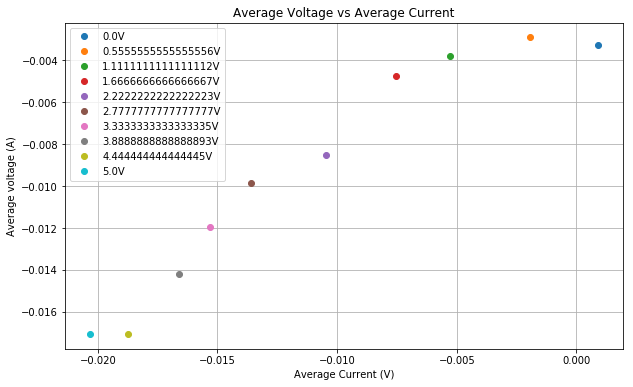

In [28]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai3")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 5, 10)
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        try:
            gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        except Exception as e:
            print(f"Error writing to instrument: {e}")
            continue

        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

        # Plot average voltage against average current
        plt.plot( np.mean(current_data), np.mean(voltage_data), 'o', label=f'{amplitude}V')

# Customize the plot
plt.title('Average Voltage vs Average Current')
plt.xlabel('Average Current (V)')
plt.ylabel('Average voltage (A)')
plt.legend()
plt.grid(True)
plt.show()

# The rest of your code for closing the generator and plotting the data
try:
    gen.write('OUTPut1:STATe Off')
    gen.close()
except Exception as e:
    print(f"Error closing the instrument: {e}")


Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.065 V
Current Standard Deviation (I-Mon): 0.000 A
Voltage Standard Deviation (V-Mon): 0.001 V
Amplitude: 0.42857142857142855
Current Mean (I-Mon): -0.001 A
Voltage Mean (V-Mon): -0.176 V
Current Standard Deviation (I-Mon): 0.002 A
Voltage Standard Deviation (V-Mon): 0.002 V
Amplitude: 0.8571428571428571
Current Mean (I-Mon): -0.004 A
Voltage Mean (V-Mon): -0.343 V
Current Standard Deviation (I-Mon): 0.003 A
Voltage Standard Deviation (V-Mon): 0.006 V
Amplitude: 1.2857142857142856
Current Mean (I-Mon): -0.005 A
Voltage Mean (V-Mon): -0.428 V
Current Standard Deviation (I-Mon): 0.005 A
Voltage Standard Deviation (V-Mon): 0.007 V
Amplitude: 1.7142857142857142
Current Mean (I-Mon): -0.007 A
Voltage Mean (V-Mon): -0.481 V
Current Standard Deviation (I-Mon): 0.007 A
Voltage Standard Deviation (V-Mon): 0.006 V
Amplitude: 2.142857142857143
Current Mean (I-Mon): -0.012 A
Voltage Mean (V-Mon): -0.749 V
Current Standard Deviati

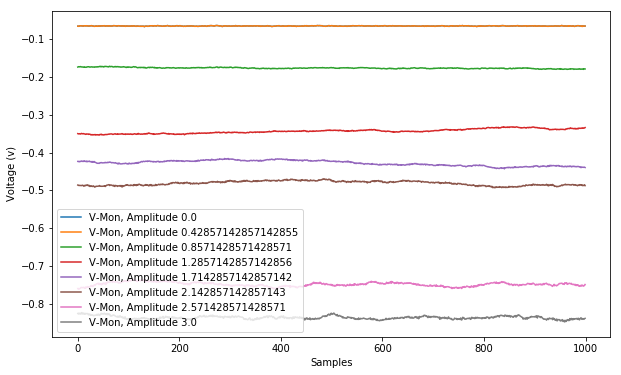

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1
#gen.write('OUTPut2:STATe On')  # Turning on the output of Channel 2

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data
voltage_mean = []

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai3")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 8)
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

# The rest of your code for closing the generator and plotting the data
gen.write('OUTPut1:STATe Off')
#gen.write('OUTPut2:STATe Off')  # Turn off the generator
gen.close()

# Plot data from both channels
for i in amplitude_range:
    current_column_index = int(2 * (i - 1))  # For example, if i is 1, then current_column_index would be 0,
    voltage_column_index = int(2 * i)        # and voltage_column_index would be 2. If i is 2, then current_column_index would be
                                             # 2, and voltage_column_index would be 4, and so on.
   

    # Check if the indices are within the valid range
    #if current_column_index < df.shape[1]:
     #   plt.plot(df.iloc[:, current_column_index], label=f'I-Mon, Amplitude {i}')

    if voltage_column_index < df1.shape[1]:
        plt.plot(df1.iloc[:, voltage_column_index], label=f'V-Mon, Amplitude {i}')
        
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (v)')
plt.title('')
plt.show()


Amplitude: 0.0
Current Mean (I-Mon): 0.001 A
Voltage Mean (V-Mon): -0.092 V
Current Standard Deviation (I-Mon): 0.000 A
Voltage Standard Deviation (V-Mon): 0.000 V
Amplitude: 0.42857142857142855
Current Mean (I-Mon): -0.001 A
Voltage Mean (V-Mon): -0.255 V
Current Standard Deviation (I-Mon): 0.002 A
Voltage Standard Deviation (V-Mon): 0.003 V
Amplitude: 0.8571428571428571
Current Mean (I-Mon): -0.004 A
Voltage Mean (V-Mon): -0.481 V
Current Standard Deviation (I-Mon): 0.003 A
Voltage Standard Deviation (V-Mon): 0.002 V
Amplitude: 1.2857142857142856
Current Mean (I-Mon): -0.006 A
Voltage Mean (V-Mon): -0.607 V
Current Standard Deviation (I-Mon): 0.005 A
Voltage Standard Deviation (V-Mon): 0.003 V
Amplitude: 1.7142857142857142
Current Mean (I-Mon): -0.007 A
Voltage Mean (V-Mon): -0.704 V
Current Standard Deviation (I-Mon): 0.007 A
Voltage Standard Deviation (V-Mon): 0.006 V
Amplitude: 2.142857142857143
Current Mean (I-Mon): -0.012 A
Voltage Mean (V-Mon): -1.028 V
Current Standard Deviati

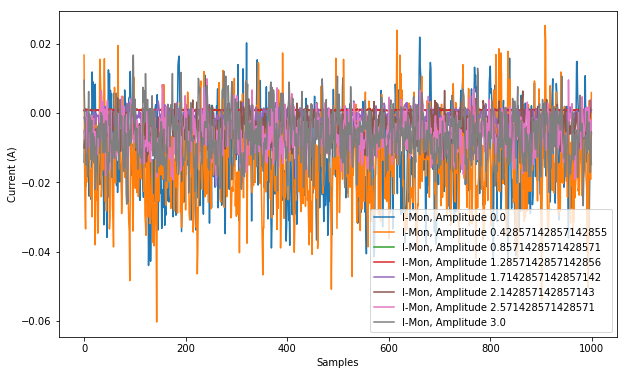

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 17 14:41:52 2023
@author: AJ
"""
#%matplotlib notebook 
import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# FIRST PART: MODULATE AMPLITUDE
rm = visa.ResourceManager()
gen = rm.open_resource(r'USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')  # Rigol DG1022 noise generator
gen.write('*RST')  # Reset the generator
gen.write('OUTPut1:STATe On')  # Turning on the output of Channel 1
#gen.write('OUTPut2:STATe On')  # Turning on the output of Channel 2

df = pd.DataFrame()      # DATA FRAME FOR CurrentMonitor as current_data
df1 = pd.DataFrame()     # DATA FRAME FOR VoltageMonitor as voltage_data
voltage_mean = []

# SECOND PART: READ the VOLTAGE
with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")  # Set the channel to read I-Mon from
    send_current.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate

    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai3")  # Add another channel to read the V-Mon
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)  # Set the sampling rate
    
    # Read the voltage and apply noise
    amplitude_range = np.linspace(0, 3, 8)
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed
    for i in amplitude_range:
        amplitude = i  # Change the amplitude of the noise signal
        gen.write(f'SOUR1:APPL:NOIS {amplitude}')  # Apply noise with the specified amplitude
        time.sleep(1)  # Wait for the noise to settle

        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        # Assuming you want to separate the data into different columns in the DataFrame
        df[f'{amplitude}V'] = current_data
        df1[f'{amplitude}V'] = voltage_data

        current_std = np.std(current_data)
        voltage_std = np.std(voltage_data)

        print(f'Amplitude: {amplitude}')
        print(f'Current Mean (I-Mon): {np.mean(current_data):.3f} A')
        print(f'Voltage Mean (V-Mon): {np.mean(voltage_data):.3f} V')
        print(f'Current Standard Deviation (I-Mon): {current_std:.3f} A')
        print(f'Voltage Standard Deviation (V-Mon): {voltage_std:.3f} V')

# The rest of your code for closing the generator and plotting the data
gen.write('OUTPut1:STATe Off')
#gen.write('OUTPut2:STATe Off')  # Turn off the generator
gen.close()

# Plot data from both channels
for i in amplitude_range:
    current_column_index = int(2 * (i - 1))  # For example, if i is 1, then current_column_index would be 0,
    voltage_column_index = int(2 * i)        # and voltage_column_index would be 2. If i is 2, then current_column_index would be
                                             # 2, and voltage_column_index would be 4, and so on.
   

    # Check if the indices are within the valid range
    if current_column_index < df.shape[1]:
        plt.plot(df.iloc[:, current_column_index], label=f'I-Mon, Amplitude {i}')

    #if voltage_column_index < df1.shape[1]:
     #   plt.plot(df1.iloc[:, voltage_column_index], label=f'V-Mon, Amplitude {i}')
        
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.title('')
plt.show()
